# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [62]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [63]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [64]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html

# Set the URL to visit to a variable
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'

# Send the browser to the URL
browser.visit(url)

# Save the HTML from the browser
html = browser.html

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [65]:
# Create a Beautiful Soup Object
html_soup = soup(html, 'html.parser') 

In [66]:
# Extract all rows of data
all_rows = html_soup.find('table',class_='table')
all_rows

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [67]:
# Create an empty list
rows = []
# Loop through the scraped data to create a list of rows
for each_row in all_rows.find_all('tr',class_='data-row'):
    row_list = each_row.find_all('td')
    row_list = [td.text.strip() for td in row_list]
    rows.append(row_list)
    print(row_list)

['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0']
['172', '2012-09-05', '

In [68]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
headers = [header.text.strip() for header in all_rows.find_all('th')]

mars_temp_df = pd.DataFrame(rows, columns=headers)

In [69]:
# Confirm DataFrame was created successfully
mars_temp_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [70]:
# Examine data type of each column
mars_temp_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [71]:
# Change data types for data analysis
mars_temp_df['id']=mars_temp_df['id'].astype(int)
mars_temp_df['terrestrial_date']=pd.to_datetime(mars_temp_df['terrestrial_date'])
mars_temp_df['sol']=mars_temp_df['sol'].astype(int)
mars_temp_df['ls']=mars_temp_df['ls'].astype(int)
mars_temp_df['month']=mars_temp_df['month'].astype(int)
mars_temp_df['min_temp']=mars_temp_df['min_temp'].astype(float)
mars_temp_df['pressure']=mars_temp_df['pressure'].astype(float)


In [72]:
# Confirm type changes were successful by examining data types again
mars_temp_df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [73]:
# 1. How many months are there on Mars?
number_of_months = mars_temp_df['month'].nunique()
print(f'There are {number_of_months} months on Mars')

There are 12 months on Mars


In [74]:
# 2. How many Martian days' worth of data are there?
martian_days = mars_temp_df['sol'].nunique()
print(f'There are {martian_days} Martian days worth of data')

There are 1867 Martian days worth of data


In [75]:
# 3. What is the average low temperature by month?
avg_low_temp = round(mars_temp_df.groupby('month')['min_temp'].mean(),2)
# Get the Dataframe
avg_low_temp_df=pd.DataFrame(avg_low_temp).reset_index()
avg_low_temp_df.columns=['Month','Avg low temperature']
avg_low_temp_df

,Month,Avg low temperature
0,1,-77.16
1,2,-79.93
2,3,-83.31
3,4,-82.75
4,5,-79.31
5,6,-75.30
6,7,-72.28
7,8,-68.38
8,9,-69.17
9,10,-71.98


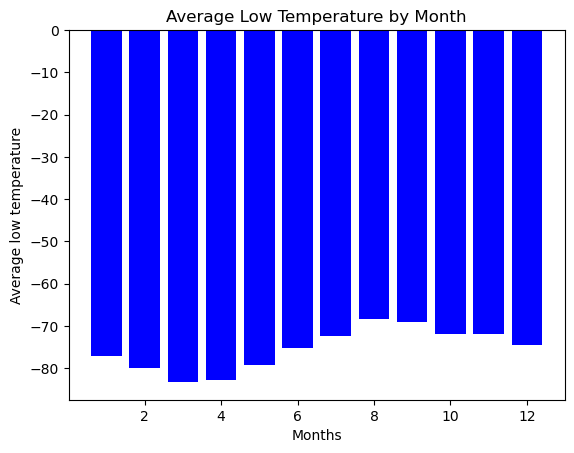

In [76]:
# Plot the average temperature by month
plt.bar(avg_low_temp_df['Month'],avg_low_temp_df['Avg low temperature'], color='blue')

# Create labels
plt.xlabel('Months')
plt.ylabel('Average low temperature')

# Create title
plt.title('Average Low Temperature by Month')

plt.show()

In [77]:
# Identify the coldest and hottest months in Curiosity's location
# Identify the coldest months in Curiosity's location
coldest_mar_temp = avg_low_temp_df['Avg low temperature'].min()
coldest_month_temp = avg_low_temp_df.loc[avg_low_temp_df['Avg low temperature']==coldest_mar_temp]
coldest_month_temp

,Month,Avg low temperature
2,3,-83.31


In [78]:
# Identify the hottest months in Curiosity's location
hottest_mar_temp = avg_low_temp_df['Avg low temperature'].max()
hottest_month_temp = avg_low_temp_df.loc[avg_low_temp_df['Avg low temperature']==hottest_mar_temp]
hottest_month_temp

,Month,Avg low temperature
7,8,-68.38


In [79]:
# 4. Average pressure by Martian month
avg_pressure = mars_temp_df.groupby('month')['pressure'].mean()
# Get the Dataframe
avg_pressure_df=pd.DataFrame(avg_pressure).reset_index()
avg_pressure_df.columns=['Month','Avg pressure']
avg_pressure_df

,Month,Avg pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


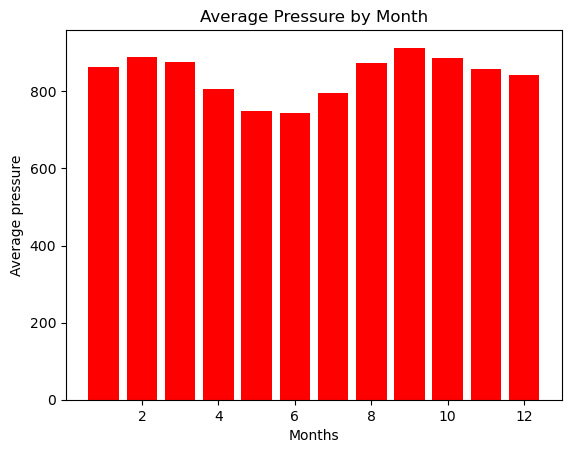

In [80]:
# Plot the average pressure by month
plt.bar(avg_pressure_df['Month'],avg_pressure_df['Avg pressure'], color='red')

# Create labels
plt.xlabel('Months')
plt.ylabel('Average pressure')

# Create title
plt.title('Average Pressure by Month')

plt.show()

In [84]:
# terrestrial_date: the date on Earth
# sol: the number of elapsed sols (Martian days) since Curiosity landed on Mars
# ls: the solar longitude
# month: the Martian month
# Get the solar longitude for the start date
start_solar_lon = mars_temp_df['ls'].loc[0]
# start_solar_lon = 155
# Display the data of lon = 155
data_lon = mars_temp_df.loc[mars_temp_df['ls']==start_solar_lon]
data_lon

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
598,621,2014-07-03,678,155,6,-77.0,739.0
599,624,2014-07-04,679,155,6,-77.0,738.0
1249,1274,2016-05-20,1346,155,6,-75.0,737.0
1250,1277,2016-05-21,1347,155,6,-75.0,736.0


In [101]:
# 5. How many terrestrial (earth) days are there in a Martian year?
terrestrial_days = data_lon['terrestrial_date'].iloc[1]-data_lon['terrestrial_date'].iloc[0] 
terrestrial_days
print(f' The equivalent of a Martian year, corresponds to about {terrestrial_days} spent on earth. ' )

 The equivalent of a Martian year, corresponds to about 686 days 00:00:00 spent on earth. 


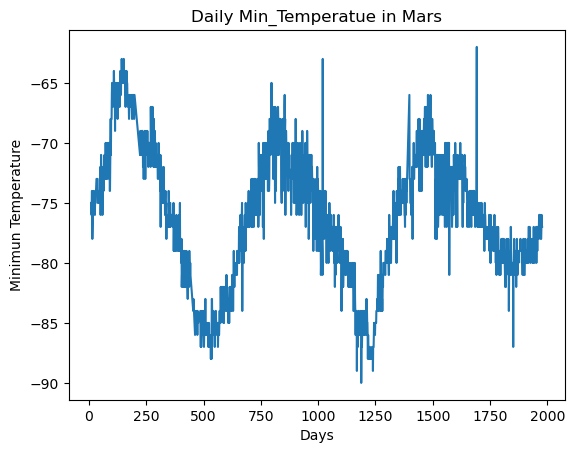

In [128]:
# Visually estimate the result by plotting the daily minimum temperature.
plt.plot(mars_temp_df['sol'], mars_temp_df['min_temp'])

# Create labels & title
plt.xlabel('Days')
plt.ylabel('Minimun Temperature')
plt.title('Daily Min_Temperatue in Mars')
# Display
plt.show()

* We notice that we have 3 frequencies every 2000 days, or Mars rotates the sun 3 times in 2000 days. This means that a Martian year is around 2000/3 = 666 terrestrial days.

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [129]:
# Write the data to a CSV
mars_temp_df.to_csv('Mars_data.csv', index=False)

In [130]:
browser.quit()